# **Placements**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.stats import kurtosis,skew

from matplotlib.colors import LinearSegmentedColormap

In [2]:
data = pd.read_csv('Campus Placement.csv')
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


### Column Description

-   gender
-   ssc_p -> 10th class percentage
-   ssc_b -> 10th class board
-   hsc_p -> 12th class percentage
-   hsc_b -> 12th class board
-   hsc_s -> 12th class branch
-   degree_p -> undergraduate degree percentage
-   degree_t -> degree branch
-   workex -> work experience
-   etest_p -> Entrance test percentage
-   specialisation -> MBA branch
-   mba_p -> MBA percentage
-   status -> placement status
-   salary -> quoted salary

In [3]:
data.rename(columns={'specialisation':'mba_t'}, inplace=True)

In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    215 non-null    object 
 1   ssc_p     215 non-null    float64
 2   ssc_b     215 non-null    object 
 3   hsc_p     215 non-null    float64
 4   hsc_b     215 non-null    object 
 5   hsc_s     215 non-null    object 
 6   degree_p  215 non-null    float64
 7   degree_t  215 non-null    object 
 8   workex    215 non-null    object 
 9   etest_p   215 non-null    float64
 10  mba_t     215 non-null    object 
 11  mba_p     215 non-null    float64
 12  status    215 non-null    object 
 13  salary    148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


1. salary has null values

In [6]:
data.fillna(0,inplace=True)

Filling them with zeros, which is acceptable technically and avoid NaN's

In [7]:
data['salary'].isna().sum()

0

In [8]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# Univariate Analysis

#### Function for value counts

In [9]:
def valueCounts(lst):
    for i in lst:
        print(i)
        print(data[i].value_counts())
        print('')

### Gender

In [10]:
valueCounts(['gender'])

gender
M    139
F     76
Name: gender, dtype: int64



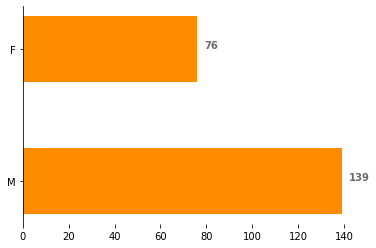

In [11]:
fig, ax = plt.subplots()

ax. spines["right"].set_visible(False)
ax. spines["top"].set_visible(False)
ax. spines["bottom"].set_visible(False)

width = 0.5
x = data['gender'].value_counts().index
y = data['gender'].value_counts().values
 
ax.barh(x, y, width, color = "darkorange")
 
for i, v in enumerate(y):
    ax.text(v + 3, i + .005, str(v),
            color = 'dimgray', fontweight = 'bold')
plt.show()

### ssc_p(10th percentage)

e:\virtualenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ssc_p', ylabel='Density'>

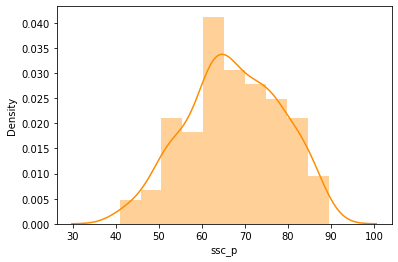

In [12]:
sns.distplot(data.ssc_p, hist=True, color = 'darkorange')

> - The students with above 40 as their ssc score, only are given admission to the college

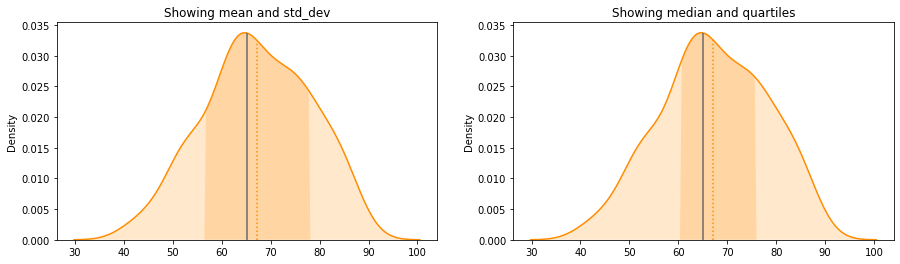

In [13]:
x = data.ssc_p.values
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
for ax in axes:
    sns.kdeplot(x, shade=False, color='darkorange', ax=ax)
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    if ax == axes[0]:
        middle = x.mean()
        sdev = x.std()
        left = middle - sdev
        right = middle + sdev
        ax.set_title('Showing mean and std_dev')
    else:
        left, middle, right = np.percentile(x, [25, 50, 75])
        ax.set_title('Showing median and quartiles')
    ax.vlines(middle, 0, np.interp(middle, xs, ys), color='darkorange', ls=':')
    center_value = (((max(data.ssc_p) - min(data.ssc_p))/2)+min(data.ssc_p))
    ax.vlines(center_value, 0, np.interp(center_value, xs, ys), color='dimgray', ls='-')
    ax.fill_between(xs, 0, ys, facecolor='darkorange', alpha=0.2)
    ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='darkorange', alpha=0.2)
    # ax.set_ylim(ymin=0)
plt.show()

- According to the above graphs 
    - students scoring below the mean(67) are **less** when compared to students scoring above the mean(67)
- majority of the students scored above the mean(67)
> - The majority of the group are with good score students(:: 2nd graph, the are of the region between median and 75 percentile is significantly high) 
<br><br/>
> - The center value of the graph(x axis) is supposed to be the **mean, median, mode and peak** for a normal distribution graph but here the **mode and peak** are almost at the center but **mean and median** are drifted towards right, which means that the values are dense over the right side

In [14]:
print('min:          ',min(data.ssc_p))
print('max:          ',max(data.ssc_p))
print('center value: ',(((max(data.ssc_p) - min(data.ssc_p))/2)+min(data.ssc_p)))
print('mean:         ', data.ssc_p.mean())
print('median:       ',data.ssc_p.median())

min:           40.89
max:           89.4
center value:  65.14500000000001
mean:          67.30339534883721
median:        67.0


- The last point of the above cell is verified numerically
    - mean and median are almost the same and the center value is less than the mean 

In [15]:
print('median: ',data.ssc_p.median())
print('mean: ', data.ssc_p.mean())

median:  67.0
mean:  67.30339534883721


- this is a indication that the values are directed towards a normal distribution 
    - Because, the mean and median are almost same.

In [16]:
print('skewedness = ',round(skew(data.ssc_p.values, axis=0, bias=True),2))
print('kurtosis = ', round(kurtosis(data.ssc_p.values, fisher=False),2))

skewedness =  -0.13
kurtosis =  2.38


#### Norms for normal distribution
- skewedness = 0
- kurtosis = 3

#### Our graph result
- As -0.13 < 0, right skewed
- as 2.38 < 3, flat peak and thick tails

e:\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ssc_p'>

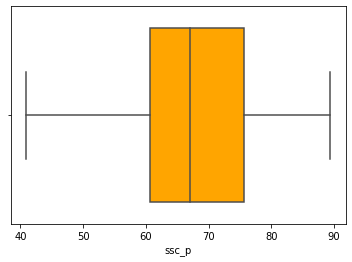

In [17]:
sns.boxplot(data.ssc_p,color = 'orange', saturation = 1)

As we already said, the graph seemed to be in normal distribution, so the are no **outliers** 

### ssc_b(10th board)

In [18]:
valueCounts(['ssc_b'])

ssc_b
Central    116
Others      99
Name: ssc_b, dtype: int64



The ratio between the category is comparitively acceptable and balanced, because the difference betwee them is only 17 

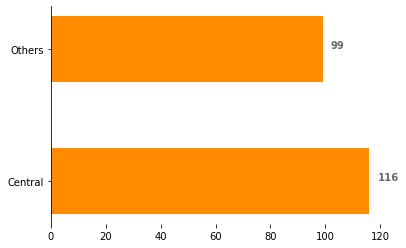

In [19]:
fig, ax = plt.subplots()

ax. spines["right"].set_visible(False)
ax. spines["top"].set_visible(False)
ax. spines["bottom"].set_visible(False)

width = 0.5
x = data['ssc_b'].value_counts().index
y = data['ssc_b'].value_counts().values
 
ax.barh(x, y, width, color = "Darkorange")
 
for i, v in enumerate(y):
    ax.text(v + 3, i + .005, str(v),
            color = 'dimgray', fontweight = 'bold')
plt.show()

## hsc_p(12th percentage)

e:\virtualenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hsc_p', ylabel='Density'>

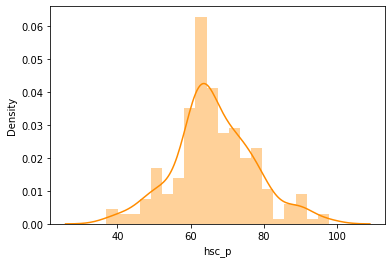

In [20]:
sns.distplot(data.hsc_p, hist=True, bins = 20, color = 'darkorange')

The reason for the peak is the sudden spike values around 60 to 65

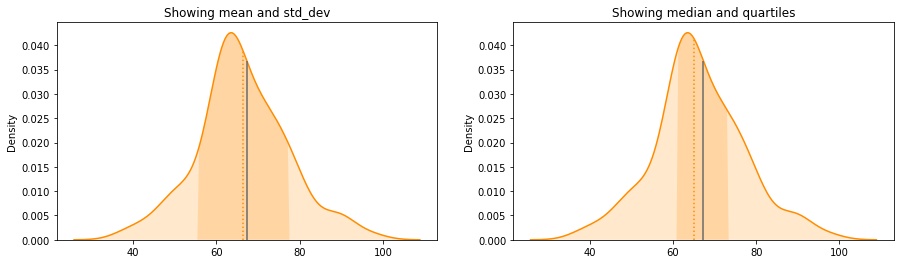

In [21]:
x = data.hsc_p.values
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
for ax in axes:
    sns.kdeplot(x, shade=False, color='darkorange', ax=ax)
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    if ax == axes[0]:
        middle = x.mean()
        sdev = x.std()
        left = middle - sdev
        right = middle + sdev
        ax.set_title('Showing mean and std_dev')
    else:
        left, middle, right = np.percentile(x, [25, 50, 75])
        ax.set_title('Showing median and quartiles')
    ax.vlines(middle, 0, np.interp(middle, xs, ys), color='darkorange', ls=':')
    center_value = (((max(data.hsc_p) - min(data.hsc_p))/2)+min(data.hsc_p))
    ax.vlines(center_value, 0, np.interp(center_value, xs, ys), color='dimgray', ls='-')
    ax.fill_between(xs, 0, ys, facecolor='darkorange', alpha=0.2)
    ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='darkorange', alpha=0.2)
    # ax.set_ylim(ymin=0)
plt.show()

The frequency around the peak seem to be high. i.e..around 55 to 77
<br><br/>
The standard deviation seem to be very high, let's check them numerically

In [22]:
print('std: ', data.hsc_p.std())

std:  10.89750915750298


For a normal distribution, within 3 standard deviations after the mean, the graph should get over. So, let's calculate them

In [23]:
print(data.hsc_p.mean()+3*data.hsc_p.std())
max(data.hsc_p)

99.02569026320663


97.7

The values are under standard dstribution only

In [24]:
print('median: ',data.hsc_p.median())
print('mean: ', data.hsc_p.mean())

median:  65.0
mean:  66.33316279069768


mean and median seem to have a slight difference, which indicates the absence of normal distribution

In [25]:
print('skewedness = ',round(skew(data.hsc_p.values, axis=0, bias=True),2))
print('kurtosis = ', round(kurtosis(data.hsc_p.values, fisher=False),2))

skewedness =  0.16
kurtosis =  3.41


#### Norms for normal distribution
- skewedness = 0
- kurtosis = 3

#### Our graph result
- As 0.16 > 0, left skewed (slightly)
- as 3.41 > 3, sharp peak and thin tails

In [26]:
print('min:          ',min(data.hsc_p))
print('max:          ',max(data.hsc_p))
print('center value: ',(((max(data.hsc_p) - min(data.hsc_p))/2)+min(data.hsc_p)))
print('mean:         ', data.hsc_p.mean())
print('median:       ',data.hsc_p.median())

min:           37.0
max:           97.7
center value:  67.35
mean:          66.33316279069768
median:        65.0


e:\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hsc_p'>

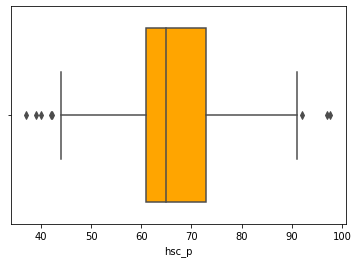

In [27]:
sns.boxplot(data.hsc_p, color ='orange', saturation = 1)

- There are outliers due to the peak in the graph
    - we shall check the values of the *peak* and *outliers*

#### First, we'll check the peak 

e:\virtualenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hsc_p', ylabel='Density'>

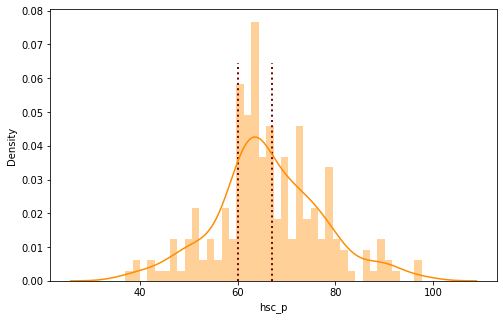

In [28]:
plt.figure(figsize=(8, 5))
plt.axvline(x=60, ymin=0.0, ymax=0.8, ls='dotted', color='maroon', label='Central',linewidth = 2.0)
plt.axvline(x=67, ymin=0.0, ymax=0.8, ls='dotted', color='maroon', label='Central',linewidth = 2.0)
sns.distplot(data.hsc_p, hist=True, bins = 40, color = 'darkorange')

now the limits are obtained, let's check the table

In [29]:
df1 = data[data['hsc_p'] <= 67]
df2 = df1[df1['hsc_p'] >= 60]
df2

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_t,mba_p,status,salary
7,M,82.0,Central,64.0,Central,Science,66.0,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
10,M,58.0,Central,61.0,Central,Commerce,60.0,Comm&Mgmt,Yes,62.00,Mkt&HR,60.85,Placed,260000.0
16,M,63.0,Central,66.2,Central,Commerce,65.6,Comm&Mgmt,Yes,60.00,Mkt&Fin,62.54,Placed,300000.0
17,F,55.0,Central,67.0,Central,Commerce,64.0,Comm&Mgmt,No,60.00,Mkt&Fin,67.28,Not Placed,0.0
18,F,63.0,Central,66.0,Central,Commerce,64.0,Comm&Mgmt,No,68.00,Mkt&HR,64.08,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,M,61.0,Others,62.0,Others,Commerce,65.0,Comm&Mgmt,No,62.00,Mkt&Fin,56.81,Placed,250000.0
208,F,43.0,Central,60.0,Others,Science,65.0,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,0.0
211,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.00,Mkt&Fin,53.62,Placed,275000.0
212,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.00,Mkt&Fin,69.72,Placed,295000.0


In [30]:
(86*100)/215

40.0

> Around **40%** of the records lie in the interval of 60 and 67(which is just a count of consecutive 7 integers out of 100).
- This is the reason for the peak

#### Now, we'll check the values of outliers

In [31]:
lst = sorted(data['hsc_p'])                            #taking a list of sorted values of that column
    
quantile1, quantile3 = np.percentile(lst,[25,75])         #obtaining 25th and 75th percentile
iqr_value = quantile3 - quantile1                         #finding inter-quartile value(difference)

#obtaining lower bound and upper bound
lower_bound_val = quantile1 - (1.5 * iqr_value)
upper_bound_val = quantile3 + (1.5 * iqr_value)

#print(lower_bound_val,upper_bound_val)

df1 = data[data['hsc_p'] < lower_bound_val]
df2 = data[data['hsc_p'] > upper_bound_val]
df = pd.concat([df1, df2])
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_t,mba_p,status,salary
42,M,49.00,Others,39.00,Central,Science,65.00,Others,No,63.00,Mkt&Fin,51.21,Not Placed,0.0
49,F,50.00,Others,37.00,Others,Arts,52.00,Others,No,65.00,Mkt&HR,56.11,Not Placed,0.0
120,M,58.00,Others,40.00,Others,Science,59.00,Comm&Mgmt,No,73.00,Mkt&HR,58.81,Not Placed,0.0
169,M,59.96,Others,42.16,Others,Science,61.26,Sci&Tech,No,54.48,Mkt&HR,65.48,Not Placed,0.0
206,M,41.00,Central,42.00,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0
24,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0
134,F,77.44,Central,92.00,Others,Commerce,72.00,Comm&Mgmt,Yes,94.00,Mkt&Fin,67.13,Placed,250000.0
177,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


- Observing ths table with respect to the status, 
    > Students below the **lower bound are not placed** and **above the upper bound are placed**

### hsc_b(12th board)

In [32]:
valueCounts(['hsc_b'])

hsc_b
Others     131
Central     84
Name: hsc_b, dtype: int64



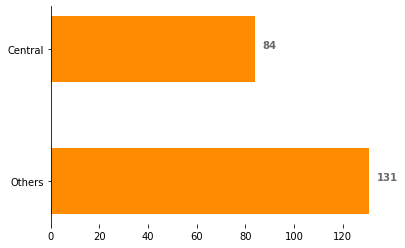

In [33]:
fig, ax = plt.subplots()

ax. spines["right"].set_visible(False)
ax. spines["top"].set_visible(False)
ax. spines["bottom"].set_visible(False)

width = 0.5
x = data['hsc_b'].value_counts().index
y = data['hsc_b'].value_counts().values
 
ax.barh(x, y, width, color = "darkorange")
 
for i, v in enumerate(y):
    ax.text(v + 3, i + .005, str(v),
            color = 'dimgray', fontweight = 'bold')
plt.show()

### hsc_s(12th branch)

In [34]:
valueCounts(['hsc_s'])

hsc_s
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64



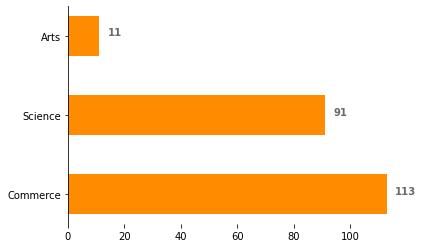

In [35]:
fig, ax = plt.subplots()

ax. spines["right"].set_visible(False)
ax. spines["top"].set_visible(False)
ax. spines["bottom"].set_visible(False)

width = 0.5
x = data['hsc_s'].value_counts().index
y = data['hsc_s'].value_counts().values
 
ax.barh(x, y, width, color = "darkorange")
 
for i, v in enumerate(y):
    ax.text(v + 3, i + .005, str(v),
            color = 'dimgray', fontweight = 'bold')
plt.show()

### degree_p(underGraduate degree percentage)

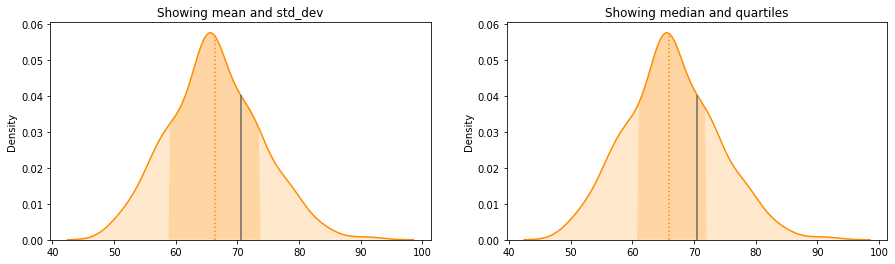

In [36]:
x = data.degree_p.values
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
for ax in axes:
    sns.kdeplot(x, shade=False, color='darkorange', ax=ax)
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    if ax == axes[0]:
        middle = x.mean()
        sdev = x.std()
        left = middle - sdev
        right = middle + sdev
        ax.set_title('Showing mean and std_dev')
    else:
        left, middle, right = np.percentile(x, [25, 50, 75])
        ax.set_title('Showing median and quartiles')
    ax.vlines(middle, 0, np.interp(middle, xs, ys), color='darkorange', ls=':')
    center_value = (((max(data.degree_p) - min(data.degree_p))/2)+min(data.degree_p))
    ax.vlines(center_value, 0, np.interp(center_value, xs, ys), color='dimgray', ls='-')
    ax.fill_between(xs, 0, ys, facecolor='darkorange', alpha=0.2)
    ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='darkorange', alpha=0.2)
    # ax.set_ylim(ymin=0)
plt.show()

By seeing both the graphs, the gray line, which points the center point of the number line(x-axis) has shifted towards the right.
- In other words the graph has shifted towards the left, which is because of the occupancy of values from 89 to 100 by the flat tail of the graph  

For instance, if the tail was'nt there, then the graph would have been symmetric and the center value(gray line) would been at the peak.
<br><br/>
Conclusively, it can be stated that,
> #### The values at the end might be an outlier(entry made by mistake) or the students might be inteligent to lie out of the box.

There are certain inferences that are directing the graph to be in normal distribution.
- Mean and Median are so close.
- Median almost touches the peak. and, 
- The area around the 1st quartile region and 3rd quartile region seem to equal.

Also, we should concentrate on the sharp peak that the graph produces.

e:\virtualenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='degree_p', ylabel='Density'>

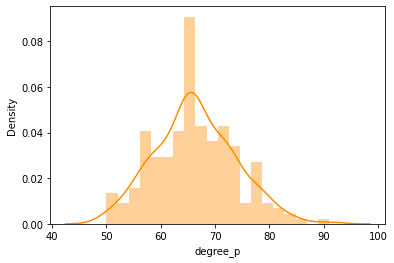

In [37]:
sns.distplot(data.degree_p, hist=True, bins = 20, color = 'darkorange')

The reason for the sharp peak can be justified with this graph
- The values around 65 in ```degree_p``` are solely responsible for the sharp peak

Also,

The assumed presence of outlier can be confirmed here with the graph
- We're able to see a small spike at 90 in ```degree_p```, which is the reason for the long tail

and finally, 

We, can also see that, the graph starts growing only from the score of 50%
- This can be because of the pass score set by the undergraduate university. That is, those who scored below 50% are considered to not have completed their degree yet.

*A subtle note here*
- *the graph has a small minor bump both before the peak and after the peak*
- *There is possibility that this could be differenciated with groups*

In [38]:
data[data['degree_p']>85]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_t,mba_p,status,salary
197,F,83.96,Others,53.0,Others,Science,91.0,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed,260000.0


Let's have a note at this record, being a credible outlier or a mistake entry.

e:\virtualenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='degree_p', ylabel='Density'>

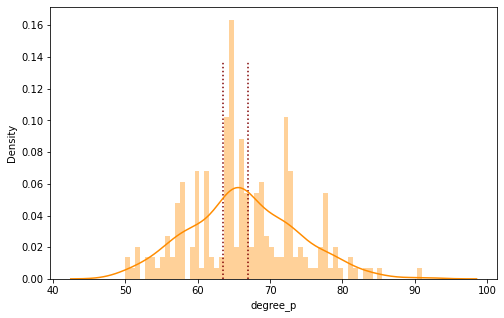

In [39]:
plt.figure(figsize=(8, 5))
plt.axvline(x=63.5, ymin=0.0, ymax=0.8, ls='dotted', color='maroon', label='Central',linewidth = 1.5)
plt.axvline(x=67, ymin=0.0, ymax=0.8, ls='dotted', color='maroon', label='Central',linewidth = 1.5)
sns.distplot(data.degree_p, hist=True, bins = 60, color = 'darkorange')

Finally we got the limits of the peak

In [40]:
df1 = data[data['degree_p'] <= 67]
df2 = df1[df1['degree_p'] >= 63]
df2

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_t,mba_p,status,salary
2,M,65.0,Central,68.0,Central,Arts,64.0,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
7,M,82.0,Central,64.0,Central,Science,66.0,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
12,F,47.0,Central,55.0,Others,Science,65.0,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,0.0
16,M,63.0,Central,66.2,Central,Commerce,65.6,Comm&Mgmt,Yes,60.00,Mkt&Fin,62.54,Placed,300000.0
17,F,55.0,Central,67.0,Central,Commerce,64.0,Comm&Mgmt,No,60.00,Mkt&Fin,67.28,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,M,69.0,Others,60.0,Others,Commerce,65.0,Comm&Mgmt,No,87.55,Mkt&Fin,52.81,Placed,300000.0
202,M,70.0,Central,63.0,Central,Science,66.0,Sci&Tech,No,61.28,Mkt&HR,60.11,Placed,240000.0
205,M,61.0,Others,62.0,Others,Commerce,65.0,Comm&Mgmt,No,62.00,Mkt&Fin,56.81,Placed,250000.0
208,F,43.0,Central,60.0,Others,Science,65.0,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,0.0


In [41]:
(65*100)/215

30.232558139534884

> Around **32%** of the records lie in the interval of 63 and 67(which is just a count of consecutive 4 integers out of 100).
- This is the reason for the peak

In [42]:
data.degree_p.std()

7.35874328733944

In [43]:
data.degree_p.mean() + 3* data.degree_p.std()

88.44641590852996

The max obtained is 91 and the graph gets over by 88.44 as per standard deviation rules
- which also drives the graph towards a normal distribution

In [44]:
print('min:          ',min(data.degree_p))
print('max:          ',max(data.degree_p))
print('center value: ',(((max(data.degree_p) - min(data.degree_p))/2)+min(data.degree_p)))
print('mean:         ', data.degree_p.mean())
print('median:       ',data.degree_p.median())
print('mode:       ',data.degree_p.mode())

min:           50.0
max:           91.0
center value:  70.5
mean:          66.37018604651163
median:        66.0
mode:        0    65.0
dtype: float64


Here are two justifications that can be made with respect to the earlier statements
- The minimum score is 50
- mean and median are so close

In [45]:
print('skewedness = ',round(skew(data.degree_p.values, axis=0, bias=True),2))
print('kurtosis = ', round(kurtosis(data.degree_p.values, fisher=False),2))

skewedness =  0.24
kurtosis =  3.02


#### Norms for normal distribution
- skewedness = 0
- kurtosis = 3

#### Our graph result
- As 0.24 > 0, left skewed
- as 3.02 >= 3, slight sharp peak and thin tails

e:\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='degree_p'>

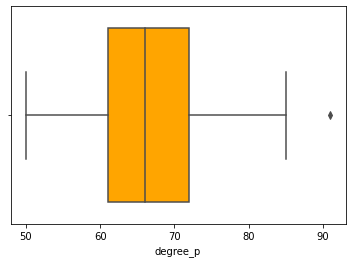

In [46]:
sns.boxplot(data.degree_p,color = 'orange', saturation = 1)

Like we assumed earlier, the entry(91%) made might be an outlier or a brillient student

### degree_t(underGraduate degree title)

In [47]:
valueCounts(['degree_t'])

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64



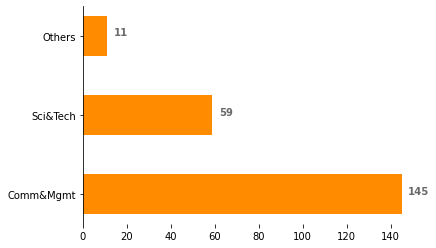

In [48]:
fig, ax = plt.subplots()

ax. spines["right"].set_visible(False)
ax. spines["top"].set_visible(False)
ax. spines["bottom"].set_visible(False)

width = 0.5
x = data['degree_t'].value_counts().index
y = data['degree_t'].value_counts().values
 
ax.barh(x, y, width, color = "darkorange")
 
for i, v in enumerate(y):
    ax.text(v + 3, i + .005, str(v),
            color = 'dimgray', fontweight = 'bold')
plt.show()

### workex(Work Experience)

In [49]:
valueCounts(['workex'])

workex
No     141
Yes     74
Name: workex, dtype: int64



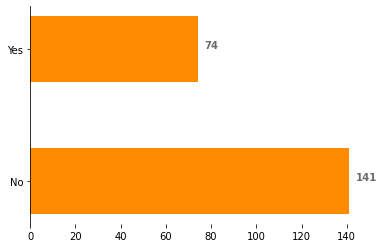

In [50]:
fig, ax = plt.subplots()

ax. spines["right"].set_visible(False)
ax. spines["top"].set_visible(False)
ax. spines["bottom"].set_visible(False)

width = 0.5
x = data['workex'].value_counts().index
y = data['workex'].value_counts().values
 
ax.barh(x, y, width, color = "darkorange")
 
for i, v in enumerate(y):
    ax.text(v + 3, i + .005, str(v),
            color = 'dimgray', fontweight = 'bold')
plt.show()

### etest_p(Entrance Test)

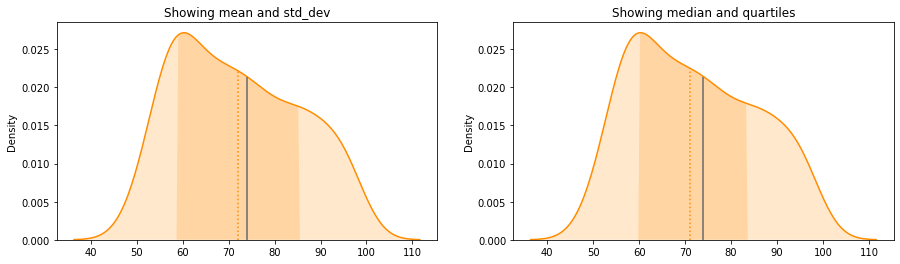

In [51]:
x = data.etest_p.values
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
for ax in axes:
    sns.kdeplot(x, shade=False, color='darkorange', ax=ax)
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    if ax == axes[0]:
        middle = x.mean()
        sdev = x.std()
        left = middle - sdev
        right = middle + sdev
        ax.set_title('Showing mean and std_dev')
    else:
        left, middle, right = np.percentile(x, [25, 50, 75])
        ax.set_title('Showing median and quartiles')
    ax.vlines(middle, 0, np.interp(middle, xs, ys), color='darkorange', ls=':')
    center_value = (((max(data.etest_p) - min(data.etest_p))/2)+min(data.etest_p))
    ax.vlines(center_value, 0, np.interp(center_value, xs, ys), color='dimgray', ls='-')
    ax.fill_between(xs, 0, ys, facecolor='darkorange', alpha=0.2)
    ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='darkorange', alpha=0.2)
    # ax.set_ylim(ymin=0)
plt.show()

By, seeing the chart, its obvious that this is not in normal distribution
- The graph **spikes up around 50 and falls down after 95.** and, 
    - from 50 to 95 there is gradual declination 
- We also see, small **minor bumps after the peak, which might be because of some groups.**
    - *we'll check them later*         

Fortunately, the mean and median are close to each other.

First graph: 
- The standard deviation seem to be high, such that 3 times the std goes beyond the graph after or before the mean. Which is clearly not a sign for it to be in normal distribution.           

Second graph:
- It seems that the group before the 2nd quartile(median) is large than the group after the median(2nd quartile).

e:\virtualenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='etest_p', ylabel='Density'>

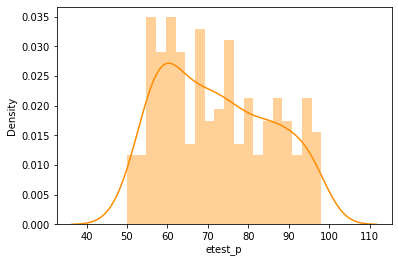

In [52]:
sns.distplot(data.etest_p, hist=True, bins = 20, color = 'darkorange')

From here, we can confirm that the entrance test scores strictly start from 50% only
- This might be because of the MBA institute, which was giving admission to students based on cutoff(50%) of the entrance test.          

Speaking about the difficulty of the test when compared to other exams(ssc, hsc, degree) that they have completed, this test seem to be the easiest among them.
- This is because, The graph's relegation should have come to the end(100) smoothly, whereas it shows a sudden fall after ~98.
    - Which means there are a lot of students who scored more than 80 or 90 percentage, who had almost a normal distribution graph for thier other exam scores.          
    
To conclude,      
> - 50% percentage is the minimum cutoff set for the admissions for MBA
> - The Entrance test is the easiest among other exams(ssc, hsc, degree) that they have taken earlier

In [53]:
print('min:          ',min(data.etest_p))
print('max:          ',max(data.etest_p))
print('center value: ',(((max(data.etest_p) - min(data.etest_p))/2)+min(data.etest_p)))
print('mean:         ', data.etest_p.mean())
print('median:       ',data.etest_p.median())
print('mode:       ',data.etest_p.mode())

min:           50.0
max:           98.0
center value:  74.0
mean:          72.10055813953488
median:        71.0
mode:        0    60.0
dtype: float64


In [54]:
print('skewedness = ',round(skew(data.etest_p.values, axis=0, bias=True),2))
print('kurtosis = ', round(kurtosis(data.etest_p.values, fisher=False),2))

skewedness =  0.28
kurtosis =  1.91


#### Norms for normal distribution
- skewedness = 0
- kurtosis = 3

#### Our graph result
- As 0.28 > 0, left skewed
- as 1.91 << 3, very flat peak and thick tails

e:\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='etest_p'>

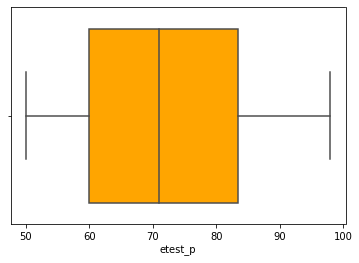

In [55]:
sns.boxplot(data.etest_p,color = 'orange', saturation = 1)

Fortunately, there are no outliers

### mba_p(MBA degree percentage)

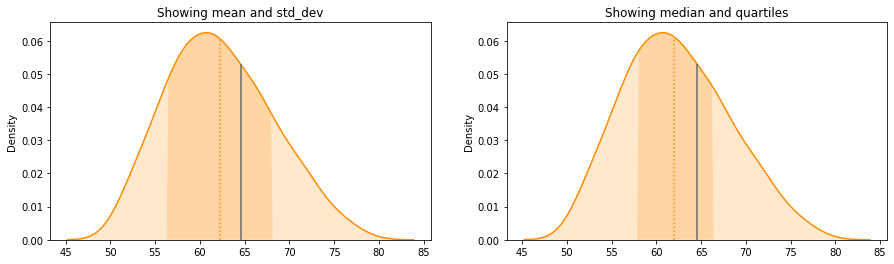

In [56]:
x = data.mba_p.values
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
for ax in axes:
    sns.kdeplot(x, shade=False, color='darkorange', ax=ax)
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    if ax == axes[0]:
        middle = x.mean()
        sdev = x.std()
        left = middle - sdev
        right = middle + sdev
        ax.set_title('Showing mean and std_dev')
    else:
        left, middle, right = np.percentile(x, [25, 50, 75])
        ax.set_title('Showing median and quartiles')
    ax.vlines(middle, 0, np.interp(middle, xs, ys), color='darkorange', ls=':')
    center_value = (((max(data.mba_p) - min(data.mba_p))/2)+min(data.mba_p))
    ax.vlines(center_value, 0, np.interp(center_value, xs, ys), color='dimgray', ls='-')
    ax.fill_between(xs, 0, ys, facecolor='darkorange', alpha=0.2)
    ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='darkorange', alpha=0.2)
    # ax.set_ylim(ymin=0)
plt.show()

First of all, the graph is so clear and seem to be in normal distribution
- The center value(gray line) has well shifted towards the right, which means the graph is very well left shifted(skewed).       

Observing both the graphs, we can make a general inference
- The graph mostly starts at 50%, goes all the way to the peak at 60% and relegates smoothly and ends at 80%. which can be explained as,     

    - **The postgraduate university might also have set the pass percentage as 50%** like undergraduate degree scores and entrance test scores. and, 
    - **This exam is expected to be the most difficult exams of a students education chronology** because, the graph almost ends before 80% itself, which means no student has crossed the score of ~80%.       
    
First graph:
- The mean is almost pointing to the peak, which is a positive sign for the graph to be in normal distribution.
- The standard deviation is also expected to be apt for the graph. we'll check the numerically too.         

Second graph:
- Both 2nd and 3rd quartile regions seem to be equal.      

Both mean and median are close



e:\virtualenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mba_p', ylabel='Density'>

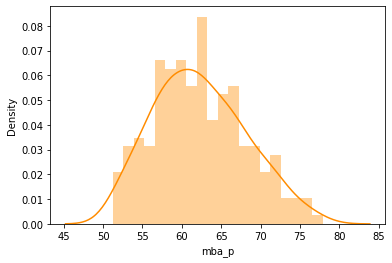

In [57]:
sns.distplot(data.mba_p, hist=True, bins = 20, color = 'darkorange')

The subjects which were uncertainly discussed, can be supported with evidence here,
- The minimum value infact starts after 50% and the maximum ends before 80%

In [58]:
data.mba_p.std()

5.833384580683801

In [59]:
data.mba_p.mean() + 3* data.mba_p.std()

79.77833978856304

The max obtained is 77.89 and the graph gets over by 79.77(as per standard deviation rules).
- which gives a reason for the graph to be in normal distribution

In [60]:
print('min:          ',min(data.mba_p))
print('max:          ',max(data.mba_p))
print('center value: ',(((max(data.mba_p) - min(data.mba_p))/2)+min(data.mba_p)))
print('mean:         ', data.mba_p.mean())
print('median:       ',data.mba_p.median())
print('mode:       ',data.mba_p.mode())

min:           51.21
max:           77.89
center value:  64.55
mean:          62.278186046511635
median:        62.0
mode:        0    56.7
dtype: float64


- Mean and Median are close.
- minimum and maximum are as expected.

In [61]:
print('skewedness = ',round(skew(data.mba_p.values, axis=0, bias=True),2))
print('kurtosis = ', round(kurtosis(data.mba_p.values, fisher=False),2))

skewedness =  0.31
kurtosis =  2.51


#### Norms for normal distribution
- skewedness = 0
- kurtosis = 3

#### Our graph result
- As 0.31 > 0, left skewed
- as 2.51 < 3, slight flat peak and thick tails

e:\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mba_p'>

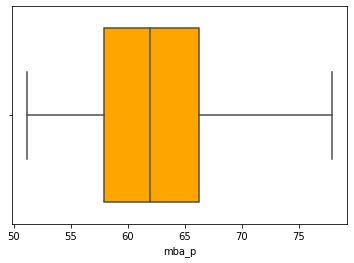

In [62]:
sns.boxplot(data.mba_p,color = 'orange', saturation = 1)

There are no outliers.

### mba_t(MBA degree title)

In [63]:
valueCounts(['mba_t'])

mba_t
Mkt&Fin    120
Mkt&HR      95
Name: mba_t, dtype: int64



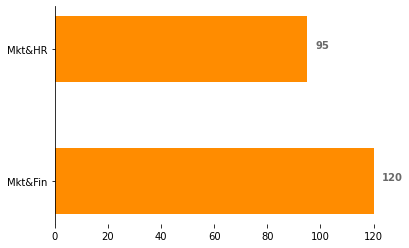

In [64]:
fig, ax = plt.subplots()

ax. spines["right"].set_visible(False)
ax. spines["top"].set_visible(False)
ax. spines["bottom"].set_visible(False)

width = 0.5
x = data['mba_t'].value_counts().index
y = data['mba_t'].value_counts().values
 
ax.barh(x, y, width, color = "darkorange")
 
for i, v in enumerate(y):
    ax.text(v + 3, i + .005, str(v),
            color = 'dimgray', fontweight = 'bold')
plt.show()